In [ ]:
!gdown --id 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn

In [2]:
import zipfile
import os 

zip_file_path = 'Aloe_images.zip'

extract_to = 'aloe_images'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Giải nén thành công!")

Giải nén thành công!


### **Cài đặt thuật toán**

In [1]:
import cv2 
import numpy as np 

In [2]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y)**2

In [3]:
def window_based_matching_l1(left_image, right_image, disparity_range, kernel_size=5,save_result=True):
    left = cv2.imread(left_image, 0)
    right = cv2.imread(right_image, 0)
    left = left.astype(np.float32)
    right = right.astype(np.float32)
    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    scale = 3 
    max_value = 255 * 9 
    kernel_half = int((kernel_size-1)/2)

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):
            disparity = 0
            cost_min = 65534 
            for j in range(disparity_range):
                total = 0
                value = 0
                for v in range(-kernel_half, kernel_half+1):
                    for u in range(-kernel_half, kernel_half):
                        value = max_value 
                        if (x + u - j) >= 0:
                            value = l1_distance(int(left[y+v, x+u]), int(right[y+v, (x+u)-j]))
                        total += value
                if total < cost_min:
                    cost_min = total
                    disparity = j 
            depth[y, x] = disparity * scale 
    if save_result == True:
        print(f'Saving result...')
        cv2.imwrite(f'window_based_l1.png', depth)
        cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')
    return depth   

In [4]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)
    left  = left.astype(np.float32)
    right = right.astype(np.float32)
    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 ** 2
    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):
            disparity = 0
            cost_min  = 65534
            for j in range(disparity_range):
                total = 0
                value = 0
                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))
                        total += value
                if total < cost_min:
                    cost_min = total
                    disparity = j
            depth[y, x] = disparity * scale
    if save_result == True:
        print('Saving result...')
        cv2.imwrite(f'window_based_l2.png', depth)
        cv2.imwrite(f'window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')
    return depth

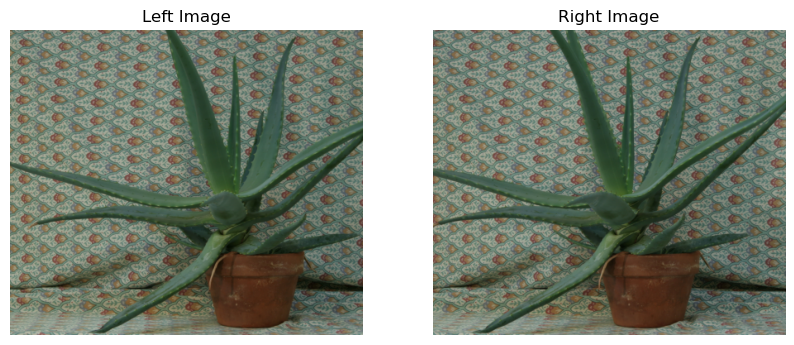

In [5]:
import cv2 
import matplotlib.pyplot as plt 

left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 64 
kernel_size = 3

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left)
plt.axis('off')
plt.title('Left Image')

plt.subplot(1, 2, 2)
plt.imshow(right)
plt.axis('off')
plt.title('Right Image')
plt.show()

Saving result...
Done.


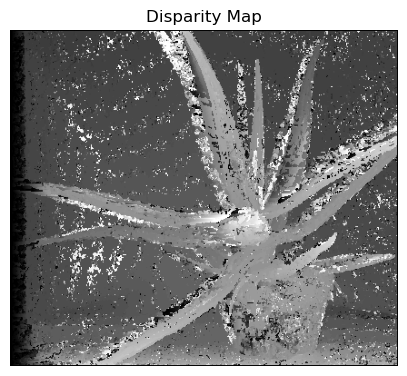

In [6]:
import cv2
import matplotlib.pyplot as plt

# Kết quả L1
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

# Hiển thị hình ảnh
plt.figure(figsize=(5, 5))
plt.imshow(depth, cmap='gray')
plt.title('Disparity Map')
plt.axis('off')  # Tắt trục
plt.show()

Saving result...
Done.


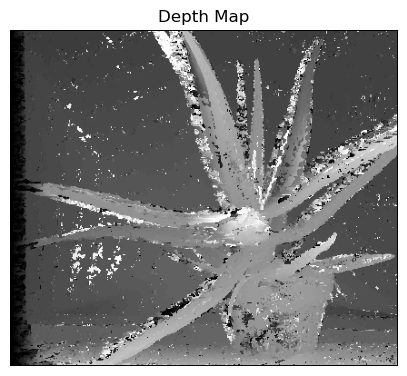

In [7]:
depth = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

plt.figure(figsize=(5, 5))
plt.imshow(depth, cmap='gray')
plt.title('Depth Map')
plt.axis('off')
plt.show()